In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from IPython.display import HTML
import seaborn as sns
pd.set_option('display.max_columns', None)

In [1]:
df = pd.read_csv('attacks.csv')
df2 = df
df.head()

NameError: name 'pd' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   src_ipv4     800000 non-null  object
 1   src_ipv6     800000 non-null  object
 2   src_mac      800000 non-null  object
 3   src_port     800000 non-null  int64 
 4   dest_port    800000 non-null  int64 
 5   duration     800000 non-null  int64 
 6   os           800000 non-null  object
 7   packet_size  800000 non-null  int64 
 8   tcp          800000 non-null  object
 9   udp          800000 non-null  object
 10  http         800000 non-null  object
 11  https        800000 non-null  object
 12  ssh          800000 non-null  object
 13  smtp         800000 non-null  object
 14  pop3         800000 non-null  object
 15  ftp          800000 non-null  object
 16  icmp         800000 non-null  object
 17  syn          800000 non-null  object
 18  ack          800000 non-null  object
 19  fi

In [5]:
df.describe()

,src_port,dest_port,duration,packet_size
count,800000.000000,800000.00000,8.000000e+05,8.000000e+05
mean,32780.646821,32775.47324,5.241233e+05,5.241068e+05
std,18915.455978,18923.18738,3.026008e+05,3.030320e+05
min,0.000000,0.00000,3.000000e+00,3.000000e+00
25%,16432.750000,16371.00000,2.623248e+05,2.613102e+05
50%,32796.000000,32792.00000,5.236865e+05,5.240365e+05
75%,49147.000000,49148.00000,7.862242e+05,7.865182e+05
max,65535.000000,65535.00000,1.048575e+06,1.048575e+06


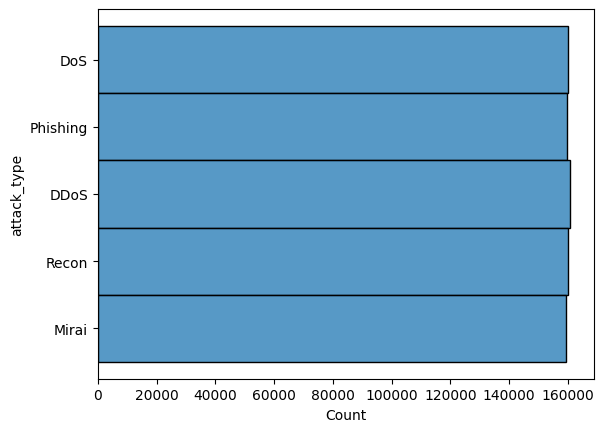

In [17]:
sns.histplot(data=df,y="attack_type")
plt.show()

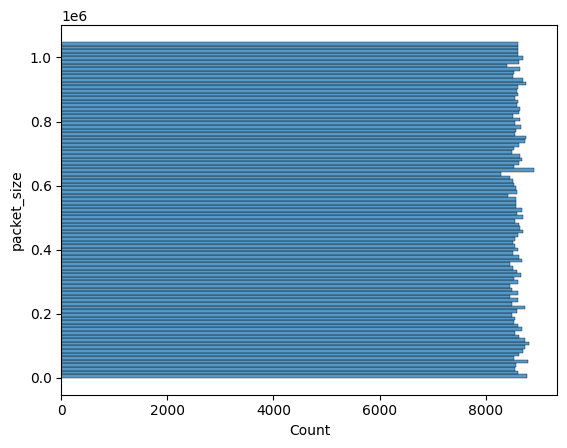

In [18]:
sns.histplot(data=df,y="packet_size")
plt.show()

In [7]:
df2 = df2.dropna()
label = LabelEncoder()
for x in df:
    if df[x].dtype == 'object':
        df2[x] = label.fit_transform(df2[x])

In [8]:
print(df2.size)
df2.drop_duplicates(inplace=True)
print(df2.size)

20000000
20000000


In [9]:
X = df2.drop(columns=['attack_type',"src_ipv4","src_ipv6","src_mac","src_port","dest_port"])
y = df2["attack_type"]